In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal, EmbeddableOneHotEncoder
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/scipy/__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.4
  UserWarning)
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' 

In [2]:
df = pd.read_csv('data/01_raw/CatData/bigmart/bigmart.csv')
df['Outlet_Size'] = df['Outlet_Size'].fillna('')

In [3]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])
y = np.log10(df[['Item_Outlet_Sales']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((6818, 10), (1705, 10))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_state=RANDOM_SEED
)

In [8]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5444177	test: 0.5371312	best: 0.5371312 (0)	total: 66.1ms	remaining: 2m 12s
1:	learn: 0.5077762	test: 0.5014253	best: 0.5014253 (1)	total: 72.6ms	remaining: 1m 12s
2:	learn: 0.4801117	test: 0.4749503	best: 0.4749503 (2)	total: 78ms	remaining: 51.9s
3:	learn: 0.4567073	test: 0.4530263	best: 0.4530263 (3)	total: 82.8ms	remaining: 41.3s
4:	learn: 0.4360121	test: 0.4332184	best: 0.4332184 (4)	total: 86.9ms	remaining: 34.7s
5:	learn: 0.4180766	test: 0.4160236	best: 0.4160236 (5)	total: 91.1ms	remaining: 30.3s
6:	learn: 0.4006324	test: 0.3992557	best: 0.3992557 (6)	total: 94.9ms	remaining: 27s
7:	learn: 0.3867437	test: 0.3858613	best: 0.3858613 (7)	total: 96.6ms	remaining: 24.1s
8:	learn: 0.3771287	test: 0.3765536	best: 0.3765536 (8)	total: 98.1ms	remaining: 21.7s
9:	learn: 0.3618415	test: 0.3619493	best: 0.3619493 (9)	total: 102ms	remaining: 20.2s
10:	learn: 0.3486326	test: 0.3486098	best: 0.3486098 (10)	total: 105ms	remaining: 19s
11:	learn: 0.3373286	test: 0.3376813	best: 0.33

129:	learn: -0.0685889	test: -0.0407782	best: -0.0407782 (129)	total: 461ms	remaining: 6.63s
130:	learn: -0.0686255	test: -0.0407671	best: -0.0407782 (129)	total: 462ms	remaining: 6.59s
131:	learn: -0.0694097	test: -0.0409046	best: -0.0409046 (131)	total: 465ms	remaining: 6.58s
132:	learn: -0.0704013	test: -0.0413385	best: -0.0413385 (132)	total: 471ms	remaining: 6.61s
133:	learn: -0.0712065	test: -0.0417819	best: -0.0417819 (133)	total: 475ms	remaining: 6.62s
134:	learn: -0.0712454	test: -0.0417763	best: -0.0417819 (133)	total: 477ms	remaining: 6.59s
135:	learn: -0.0716665	test: -0.0415971	best: -0.0417819 (133)	total: 482ms	remaining: 6.6s
136:	learn: -0.0728019	test: -0.0423088	best: -0.0423088 (136)	total: 486ms	remaining: 6.61s
137:	learn: -0.0736378	test: -0.0428452	best: -0.0428452 (137)	total: 488ms	remaining: 6.59s
138:	learn: -0.0736649	test: -0.0428248	best: -0.0428452 (137)	total: 490ms	remaining: 6.56s
139:	learn: -0.0740575	test: -0.0431332	best: -0.0431332 (139)	total: 4

247:	learn: -0.1212490	test: -0.0589368	best: -0.0589368 (247)	total: 860ms	remaining: 6.07s
248:	learn: -0.1219733	test: -0.0583535	best: -0.0589368 (247)	total: 865ms	remaining: 6.08s
249:	learn: -0.1221492	test: -0.0583000	best: -0.0589368 (247)	total: 869ms	remaining: 6.08s
250:	learn: -0.1224404	test: -0.0583555	best: -0.0589368 (247)	total: 877ms	remaining: 6.11s
251:	learn: -0.1230515	test: -0.0581894	best: -0.0589368 (247)	total: 886ms	remaining: 6.14s
252:	learn: -0.1234343	test: -0.0580303	best: -0.0589368 (247)	total: 891ms	remaining: 6.15s
253:	learn: -0.1237830	test: -0.0580225	best: -0.0589368 (247)	total: 894ms	remaining: 6.15s
254:	learn: -0.1240164	test: -0.0581418	best: -0.0589368 (247)	total: 899ms	remaining: 6.15s
255:	learn: -0.1241388	test: -0.0581654	best: -0.0589368 (247)	total: 906ms	remaining: 6.17s
256:	learn: -0.1243628	test: -0.0582942	best: -0.0589368 (247)	total: 908ms	remaining: 6.16s
257:	learn: -0.1248143	test: -0.0584447	best: -0.0589368 (247)	total: 

344:	learn: -0.1576946	test: -0.0590885	best: -0.0600580 (325)	total: 1.25s	remaining: 6.01s
345:	learn: -0.1584279	test: -0.0592435	best: -0.0600580 (325)	total: 1.26s	remaining: 6.01s
346:	learn: -0.1588674	test: -0.0590229	best: -0.0600580 (325)	total: 1.26s	remaining: 6.01s
347:	learn: -0.1592823	test: -0.0590930	best: -0.0600580 (325)	total: 1.26s	remaining: 6s
348:	learn: -0.1595705	test: -0.0590706	best: -0.0600580 (325)	total: 1.27s	remaining: 6s
349:	learn: -0.1601508	test: -0.0590777	best: -0.0600580 (325)	total: 1.27s	remaining: 5.99s
350:	learn: -0.1605055	test: -0.0591298	best: -0.0600580 (325)	total: 1.27s	remaining: 5.99s
351:	learn: -0.1607521	test: -0.0590208	best: -0.0600580 (325)	total: 1.28s	remaining: 5.99s
352:	learn: -0.1614086	test: -0.0589477	best: -0.0600580 (325)	total: 1.28s	remaining: 5.99s
353:	learn: -0.1615328	test: -0.0589000	best: -0.0600580 (325)	total: 1.29s	remaining: 5.98s
354:	learn: -0.1620443	test: -0.0589840	best: -0.0600580 (325)	total: 1.29s	

440:	learn: -0.1916949	test: -0.0524966	best: -0.0600580 (325)	total: 1.65s	remaining: 5.83s
441:	learn: -0.1921266	test: -0.0525276	best: -0.0600580 (325)	total: 1.65s	remaining: 5.83s
442:	learn: -0.1924020	test: -0.0524945	best: -0.0600580 (325)	total: 1.66s	remaining: 5.83s
443:	learn: -0.1928738	test: -0.0524541	best: -0.0600580 (325)	total: 1.66s	remaining: 5.82s
444:	learn: -0.1930202	test: -0.0523877	best: -0.0600580 (325)	total: 1.67s	remaining: 5.82s
445:	learn: -0.1931975	test: -0.0524538	best: -0.0600580 (325)	total: 1.67s	remaining: 5.82s
446:	learn: -0.1934310	test: -0.0524836	best: -0.0600580 (325)	total: 1.67s	remaining: 5.81s
447:	learn: -0.1936414	test: -0.0524173	best: -0.0600580 (325)	total: 1.68s	remaining: 5.81s
448:	learn: -0.1941588	test: -0.0521115	best: -0.0600580 (325)	total: 1.68s	remaining: 5.81s
449:	learn: -0.1942773	test: -0.0520385	best: -0.0600580 (325)	total: 1.68s	remaining: 5.8s
450:	learn: -0.1945244	test: -0.0519630	best: -0.0600580 (325)	total: 1

542:	learn: -0.2171821	test: -0.0466698	best: -0.0600580 (325)	total: 2.04s	remaining: 5.49s
543:	learn: -0.2173116	test: -0.0467205	best: -0.0600580 (325)	total: 2.05s	remaining: 5.48s
544:	learn: -0.2176525	test: -0.0465167	best: -0.0600580 (325)	total: 2.05s	remaining: 5.48s
545:	learn: -0.2179863	test: -0.0464313	best: -0.0600580 (325)	total: 2.06s	remaining: 5.47s
546:	learn: -0.2181122	test: -0.0463780	best: -0.0600580 (325)	total: 2.06s	remaining: 5.47s
547:	learn: -0.2188196	test: -0.0461198	best: -0.0600580 (325)	total: 2.06s	remaining: 5.47s
548:	learn: -0.2191723	test: -0.0462270	best: -0.0600580 (325)	total: 2.07s	remaining: 5.47s
549:	learn: -0.2193085	test: -0.0461411	best: -0.0600580 (325)	total: 2.07s	remaining: 5.46s
550:	learn: -0.2195544	test: -0.0460334	best: -0.0600580 (325)	total: 2.08s	remaining: 5.46s
551:	learn: -0.2198354	test: -0.0460749	best: -0.0600580 (325)	total: 2.08s	remaining: 5.45s
552:	learn: -0.2199327	test: -0.0460395	best: -0.0600580 (325)	total: 

644:	learn: -0.2412419	test: -0.0385893	best: -0.0600580 (325)	total: 2.44s	remaining: 5.13s
645:	learn: -0.2415882	test: -0.0383800	best: -0.0600580 (325)	total: 2.44s	remaining: 5.12s
646:	learn: -0.2418953	test: -0.0383318	best: -0.0600580 (325)	total: 2.45s	remaining: 5.12s
647:	learn: -0.2421204	test: -0.0384081	best: -0.0600580 (325)	total: 2.45s	remaining: 5.11s
648:	learn: -0.2423287	test: -0.0383539	best: -0.0600580 (325)	total: 2.46s	remaining: 5.11s
649:	learn: -0.2424335	test: -0.0383042	best: -0.0600580 (325)	total: 2.46s	remaining: 5.11s
650:	learn: -0.2425510	test: -0.0380186	best: -0.0600580 (325)	total: 2.46s	remaining: 5.1s
651:	learn: -0.2426737	test: -0.0378725	best: -0.0600580 (325)	total: 2.47s	remaining: 5.1s
652:	learn: -0.2427606	test: -0.0377505	best: -0.0600580 (325)	total: 2.47s	remaining: 5.09s
653:	learn: -0.2429888	test: -0.0380038	best: -0.0600580 (325)	total: 2.47s	remaining: 5.09s
654:	learn: -0.2432218	test: -0.0382271	best: -0.0600580 (325)	total: 2.

749:	learn: -0.2625909	test: -0.0278327	best: -0.0600580 (325)	total: 2.83s	remaining: 4.72s
750:	learn: -0.2627857	test: -0.0276993	best: -0.0600580 (325)	total: 2.84s	remaining: 4.72s
751:	learn: -0.2629519	test: -0.0272635	best: -0.0600580 (325)	total: 2.84s	remaining: 4.71s
752:	learn: -0.2631663	test: -0.0271176	best: -0.0600580 (325)	total: 2.85s	remaining: 4.71s
753:	learn: -0.2632407	test: -0.0269843	best: -0.0600580 (325)	total: 2.85s	remaining: 4.71s
754:	learn: -0.2633628	test: -0.0267629	best: -0.0600580 (325)	total: 2.85s	remaining: 4.71s
755:	learn: -0.2634753	test: -0.0264858	best: -0.0600580 (325)	total: 2.86s	remaining: 4.71s
756:	learn: -0.2635857	test: -0.0262941	best: -0.0600580 (325)	total: 2.86s	remaining: 4.7s
757:	learn: -0.2636415	test: -0.0260751	best: -0.0600580 (325)	total: 2.87s	remaining: 4.7s
758:	learn: -0.2638528	test: -0.0258130	best: -0.0600580 (325)	total: 2.87s	remaining: 4.7s
759:	learn: -0.2639830	test: -0.0258146	best: -0.0600580 (325)	total: 2.8

855:	learn: -0.2799921	test: -0.0161867	best: -0.0600580 (325)	total: 3.22s	remaining: 4.31s
856:	learn: -0.2801455	test: -0.0163211	best: -0.0600580 (325)	total: 3.23s	remaining: 4.31s
857:	learn: -0.2801800	test: -0.0162629	best: -0.0600580 (325)	total: 3.23s	remaining: 4.3s
858:	learn: -0.2802646	test: -0.0161946	best: -0.0600580 (325)	total: 3.24s	remaining: 4.3s
859:	learn: -0.2805872	test: -0.0163696	best: -0.0600580 (325)	total: 3.24s	remaining: 4.29s
860:	learn: -0.2806232	test: -0.0163204	best: -0.0600580 (325)	total: 3.24s	remaining: 4.29s
861:	learn: -0.2807220	test: -0.0162553	best: -0.0600580 (325)	total: 3.25s	remaining: 4.29s
862:	learn: -0.2809465	test: -0.0160551	best: -0.0600580 (325)	total: 3.25s	remaining: 4.28s
863:	learn: -0.2811057	test: -0.0159054	best: -0.0600580 (325)	total: 3.25s	remaining: 4.28s
864:	learn: -0.2814225	test: -0.0156394	best: -0.0600580 (325)	total: 3.26s	remaining: 4.28s
865:	learn: -0.2816844	test: -0.0154038	best: -0.0600580 (325)	total: 3.

965:	learn: -0.2967464	test: -0.0067614	best: -0.0600580 (325)	total: 3.62s	remaining: 3.87s
966:	learn: -0.2970167	test: -0.0065079	best: -0.0600580 (325)	total: 3.62s	remaining: 3.87s
967:	learn: -0.2973279	test: -0.0062581	best: -0.0600580 (325)	total: 3.63s	remaining: 3.87s
968:	learn: -0.2976800	test: -0.0059866	best: -0.0600580 (325)	total: 3.63s	remaining: 3.86s
969:	learn: -0.2979715	test: -0.0058640	best: -0.0600580 (325)	total: 3.64s	remaining: 3.86s
970:	learn: -0.2981192	test: -0.0058911	best: -0.0600580 (325)	total: 3.64s	remaining: 3.86s
971:	learn: -0.2982840	test: -0.0058157	best: -0.0600580 (325)	total: 3.64s	remaining: 3.85s
972:	learn: -0.2985150	test: -0.0057448	best: -0.0600580 (325)	total: 3.65s	remaining: 3.85s
973:	learn: -0.2986585	test: -0.0056186	best: -0.0600580 (325)	total: 3.65s	remaining: 3.85s
974:	learn: -0.2988617	test: -0.0055574	best: -0.0600580 (325)	total: 3.65s	remaining: 3.84s
975:	learn: -0.2991141	test: -0.0055029	best: -0.0600580 (325)	total: 

1061:	learn: -0.3144663	test: 0.0033221	best: -0.0600580 (325)	total: 4.01s	remaining: 3.55s
1062:	learn: -0.3145327	test: 0.0033708	best: -0.0600580 (325)	total: 4.02s	remaining: 3.54s
1063:	learn: -0.3145907	test: 0.0034135	best: -0.0600580 (325)	total: 4.02s	remaining: 3.54s
1064:	learn: -0.3148034	test: 0.0035327	best: -0.0600580 (325)	total: 4.03s	remaining: 3.54s
1065:	learn: -0.3148917	test: 0.0035192	best: -0.0600580 (325)	total: 4.03s	remaining: 3.53s
1066:	learn: -0.3150454	test: 0.0034576	best: -0.0600580 (325)	total: 4.03s	remaining: 3.53s
1067:	learn: -0.3152249	test: 0.0037252	best: -0.0600580 (325)	total: 4.04s	remaining: 3.52s
1068:	learn: -0.3154853	test: 0.0037001	best: -0.0600580 (325)	total: 4.04s	remaining: 3.52s
1069:	learn: -0.3155709	test: 0.0038409	best: -0.0600580 (325)	total: 4.04s	remaining: 3.52s
1070:	learn: -0.3157245	test: 0.0040690	best: -0.0600580 (325)	total: 4.05s	remaining: 3.51s
1071:	learn: -0.3160292	test: 0.0039484	best: -0.0600580 (325)	total: 

1169:	learn: -0.3316290	test: 0.0134762	best: -0.0600580 (325)	total: 4.41s	remaining: 3.13s
1170:	learn: -0.3318478	test: 0.0137631	best: -0.0600580 (325)	total: 4.41s	remaining: 3.13s
1171:	learn: -0.3320340	test: 0.0141218	best: -0.0600580 (325)	total: 4.42s	remaining: 3.12s
1172:	learn: -0.3321586	test: 0.0142038	best: -0.0600580 (325)	total: 4.42s	remaining: 3.12s
1173:	learn: -0.3322234	test: 0.0140615	best: -0.0600580 (325)	total: 4.43s	remaining: 3.11s
1174:	learn: -0.3324762	test: 0.0142317	best: -0.0600580 (325)	total: 4.43s	remaining: 3.11s
1175:	learn: -0.3326453	test: 0.0146102	best: -0.0600580 (325)	total: 4.43s	remaining: 3.11s
1176:	learn: -0.3326790	test: 0.0147077	best: -0.0600580 (325)	total: 4.44s	remaining: 3.1s
1177:	learn: -0.3327747	test: 0.0148148	best: -0.0600580 (325)	total: 4.44s	remaining: 3.1s
1178:	learn: -0.3328693	test: 0.0149451	best: -0.0600580 (325)	total: 4.45s	remaining: 3.1s
1179:	learn: -0.3331303	test: 0.0151262	best: -0.0600580 (325)	total: 4.4

1268:	learn: -0.3477305	test: 0.0266401	best: -0.0600580 (325)	total: 4.8s	remaining: 2.77s
1269:	learn: -0.3477307	test: 0.0267315	best: -0.0600580 (325)	total: 4.81s	remaining: 2.76s
1270:	learn: -0.3479339	test: 0.0267743	best: -0.0600580 (325)	total: 4.81s	remaining: 2.76s
1271:	learn: -0.3482004	test: 0.0270808	best: -0.0600580 (325)	total: 4.82s	remaining: 2.76s
1272:	learn: -0.3483799	test: 0.0268675	best: -0.0600580 (325)	total: 4.82s	remaining: 2.75s
1273:	learn: -0.3484934	test: 0.0269668	best: -0.0600580 (325)	total: 4.83s	remaining: 2.75s
1274:	learn: -0.3484979	test: 0.0270460	best: -0.0600580 (325)	total: 4.83s	remaining: 2.75s
1275:	learn: -0.3485454	test: 0.0270843	best: -0.0600580 (325)	total: 4.83s	remaining: 2.74s
1276:	learn: -0.3487627	test: 0.0272129	best: -0.0600580 (325)	total: 4.84s	remaining: 2.74s
1277:	learn: -0.3488814	test: 0.0272955	best: -0.0600580 (325)	total: 4.84s	remaining: 2.73s
1278:	learn: -0.3491786	test: 0.0278585	best: -0.0600580 (325)	total: 4

1377:	learn: -0.3650938	test: 0.0405489	best: -0.0600580 (325)	total: 5.21s	remaining: 2.35s
1378:	learn: -0.3652879	test: 0.0406479	best: -0.0600580 (325)	total: 5.21s	remaining: 2.35s
1379:	learn: -0.3655841	test: 0.0410506	best: -0.0600580 (325)	total: 5.21s	remaining: 2.34s
1380:	learn: -0.3656413	test: 0.0414324	best: -0.0600580 (325)	total: 5.22s	remaining: 2.34s
1381:	learn: -0.3657236	test: 0.0415532	best: -0.0600580 (325)	total: 5.22s	remaining: 2.33s
1382:	learn: -0.3658435	test: 0.0415725	best: -0.0600580 (325)	total: 5.22s	remaining: 2.33s
1383:	learn: -0.3659363	test: 0.0416260	best: -0.0600580 (325)	total: 5.23s	remaining: 2.33s
1384:	learn: -0.3660332	test: 0.0423494	best: -0.0600580 (325)	total: 5.23s	remaining: 2.32s
1385:	learn: -0.3661518	test: 0.0425504	best: -0.0600580 (325)	total: 5.24s	remaining: 2.32s
1386:	learn: -0.3663709	test: 0.0423949	best: -0.0600580 (325)	total: 5.24s	remaining: 2.31s
1387:	learn: -0.3665509	test: 0.0423906	best: -0.0600580 (325)	total: 

1473:	learn: -0.3798568	test: 0.0533803	best: -0.0600580 (325)	total: 5.6s	remaining: 2s
1474:	learn: -0.3800011	test: 0.0536207	best: -0.0600580 (325)	total: 5.61s	remaining: 2s
1475:	learn: -0.3801363	test: 0.0537031	best: -0.0600580 (325)	total: 5.61s	remaining: 1.99s
1476:	learn: -0.3802386	test: 0.0538200	best: -0.0600580 (325)	total: 5.61s	remaining: 1.99s
1477:	learn: -0.3805574	test: 0.0539088	best: -0.0600580 (325)	total: 5.62s	remaining: 1.98s
1478:	learn: -0.3808077	test: 0.0539408	best: -0.0600580 (325)	total: 5.62s	remaining: 1.98s
1479:	learn: -0.3808849	test: 0.0540840	best: -0.0600580 (325)	total: 5.62s	remaining: 1.98s
1480:	learn: -0.3811340	test: 0.0542370	best: -0.0600580 (325)	total: 5.63s	remaining: 1.97s
1481:	learn: -0.3812425	test: 0.0544438	best: -0.0600580 (325)	total: 5.63s	remaining: 1.97s
1482:	learn: -0.3813325	test: 0.0545376	best: -0.0600580 (325)	total: 5.63s	remaining: 1.96s
1483:	learn: -0.3814200	test: 0.0545523	best: -0.0600580 (325)	total: 5.64s	r

1578:	learn: -0.3950621	test: 0.0661229	best: -0.0600580 (325)	total: 5.99s	remaining: 1.6s
1579:	learn: -0.3952474	test: 0.0663709	best: -0.0600580 (325)	total: 6s	remaining: 1.59s
1580:	learn: -0.3953031	test: 0.0665211	best: -0.0600580 (325)	total: 6s	remaining: 1.59s
1581:	learn: -0.3953996	test: 0.0665653	best: -0.0600580 (325)	total: 6s	remaining: 1.59s
1582:	learn: -0.3955220	test: 0.0672252	best: -0.0600580 (325)	total: 6.01s	remaining: 1.58s
1583:	learn: -0.3958348	test: 0.0676899	best: -0.0600580 (325)	total: 6.01s	remaining: 1.58s
1584:	learn: -0.3961076	test: 0.0675676	best: -0.0600580 (325)	total: 6.01s	remaining: 1.57s
1585:	learn: -0.3962831	test: 0.0675836	best: -0.0600580 (325)	total: 6.02s	remaining: 1.57s
1586:	learn: -0.3964069	test: 0.0674405	best: -0.0600580 (325)	total: 6.02s	remaining: 1.57s
1587:	learn: -0.3964975	test: 0.0675683	best: -0.0600580 (325)	total: 6.03s	remaining: 1.56s
1588:	learn: -0.3966810	test: 0.0677138	best: -0.0600580 (325)	total: 6.03s	rema

1674:	learn: -0.4067995	test: 0.0772151	best: -0.0600580 (325)	total: 6.39s	remaining: 1.24s
1675:	learn: -0.4069119	test: 0.0772698	best: -0.0600580 (325)	total: 6.39s	remaining: 1.24s
1676:	learn: -0.4071567	test: 0.0772374	best: -0.0600580 (325)	total: 6.39s	remaining: 1.23s
1677:	learn: -0.4072255	test: 0.0772632	best: -0.0600580 (325)	total: 6.4s	remaining: 1.23s
1678:	learn: -0.4073132	test: 0.0772158	best: -0.0600580 (325)	total: 6.4s	remaining: 1.22s
1679:	learn: -0.4073679	test: 0.0772980	best: -0.0600580 (325)	total: 6.41s	remaining: 1.22s
1680:	learn: -0.4075176	test: 0.0773029	best: -0.0600580 (325)	total: 6.41s	remaining: 1.22s
1681:	learn: -0.4077817	test: 0.0773681	best: -0.0600580 (325)	total: 6.42s	remaining: 1.21s
1682:	learn: -0.4080043	test: 0.0775041	best: -0.0600580 (325)	total: 6.42s	remaining: 1.21s
1683:	learn: -0.4080354	test: 0.0775642	best: -0.0600580 (325)	total: 6.42s	remaining: 1.21s
1684:	learn: -0.4082155	test: 0.0778775	best: -0.0600580 (325)	total: 6.

1781:	learn: -0.4187225	test: 0.0870425	best: -0.0600580 (325)	total: 6.78s	remaining: 830ms
1782:	learn: -0.4189261	test: 0.0872006	best: -0.0600580 (325)	total: 6.79s	remaining: 826ms
1783:	learn: -0.4190802	test: 0.0873211	best: -0.0600580 (325)	total: 6.79s	remaining: 822ms
1784:	learn: -0.4191875	test: 0.0873543	best: -0.0600580 (325)	total: 6.8s	remaining: 819ms
1785:	learn: -0.4192472	test: 0.0873256	best: -0.0600580 (325)	total: 6.8s	remaining: 815ms
1786:	learn: -0.4194084	test: 0.0874920	best: -0.0600580 (325)	total: 6.8s	remaining: 811ms
1787:	learn: -0.4194229	test: 0.0875845	best: -0.0600580 (325)	total: 6.81s	remaining: 807ms
1788:	learn: -0.4195950	test: 0.0876729	best: -0.0600580 (325)	total: 6.81s	remaining: 803ms
1789:	learn: -0.4196773	test: 0.0877124	best: -0.0600580 (325)	total: 6.82s	remaining: 800ms
1790:	learn: -0.4197819	test: 0.0877402	best: -0.0600580 (325)	total: 6.82s	remaining: 796ms
1791:	learn: -0.4198129	test: 0.0878016	best: -0.0600580 (325)	total: 6.8

1885:	learn: -0.4303824	test: 0.0974490	best: -0.0600580 (325)	total: 7.17s	remaining: 434ms
1886:	learn: -0.4305410	test: 0.0974912	best: -0.0600580 (325)	total: 7.18s	remaining: 430ms
1887:	learn: -0.4306558	test: 0.0973882	best: -0.0600580 (325)	total: 7.18s	remaining: 426ms
1888:	learn: -0.4306797	test: 0.0974878	best: -0.0600580 (325)	total: 7.18s	remaining: 422ms
1889:	learn: -0.4307488	test: 0.0976009	best: -0.0600580 (325)	total: 7.19s	remaining: 419ms
1890:	learn: -0.4308420	test: 0.0977350	best: -0.0600580 (325)	total: 7.2s	remaining: 415ms
1891:	learn: -0.4308536	test: 0.0977599	best: -0.0600580 (325)	total: 7.2s	remaining: 411ms
1892:	learn: -0.4309180	test: 0.0978904	best: -0.0600580 (325)	total: 7.2s	remaining: 407ms
1893:	learn: -0.4311023	test: 0.0981469	best: -0.0600580 (325)	total: 7.21s	remaining: 403ms
1894:	learn: -0.4312280	test: 0.0980672	best: -0.0600580 (325)	total: 7.21s	remaining: 399ms
1895:	learn: -0.4313119	test: 0.0981063	best: -0.0600580 (325)	total: 7.2

1990:	learn: -0.4410282	test: 0.1074776	best: -0.0600580 (325)	total: 7.57s	remaining: 34.2ms
1991:	learn: -0.4410843	test: 0.1074643	best: -0.0600580 (325)	total: 7.57s	remaining: 30.4ms
1992:	learn: -0.4411558	test: 0.1073959	best: -0.0600580 (325)	total: 7.57s	remaining: 26.6ms
1993:	learn: -0.4412893	test: 0.1077197	best: -0.0600580 (325)	total: 7.58s	remaining: 22.8ms
1994:	learn: -0.4414312	test: 0.1078093	best: -0.0600580 (325)	total: 7.58s	remaining: 19ms
1995:	learn: -0.4415502	test: 0.1079147	best: -0.0600580 (325)	total: 7.59s	remaining: 15.2ms
1996:	learn: -0.4416737	test: 0.1078352	best: -0.0600580 (325)	total: 7.59s	remaining: 11.4ms
1997:	learn: -0.4416705	test: 0.1078622	best: -0.0600580 (325)	total: 7.59s	remaining: 7.6ms
1998:	learn: -0.4417740	test: 0.1077622	best: -0.0600580 (325)	total: 7.6s	remaining: 3.8ms
1999:	learn: -0.4417658	test: 0.1078332	best: -0.0600580 (325)	total: 7.6s	remaining: 0us

bestTest = -0.06005797531
bestIteration = 325

Shrink model to first

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
calculate_nll_catboost(model, x_train, y_train)

-0.10385328597676415

In [11]:
calculate_nll_catboost(model, x_test, y_test)

-0.06762394141626159

In [33]:
tree = EmbeddableOneHotEncoder(handle_unknown='ignore')

flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(50, 20), 
                                 num_blocks=1, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [34]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=20, batch_size=1024, verbose=True)

train loss: 0.7859097123146057
val loss: 0.6358961462974548
train loss: 0.8770688772201538
val loss: 0.8011155128479004
train loss: 0.6369627714157104
val loss: 0.6038675904273987
train loss: 0.5677509307861328
val loss: 0.5720576643943787
train loss: 0.5529124736785889
val loss: 0.559714674949646
train loss: 0.5318009257316589
val loss: 0.5488756895065308
train loss: 0.4986730217933655
val loss: 0.5266409516334534
train loss: 0.447224497795105
val loss: 0.49248015880584717
train loss: 0.36736947298049927
val loss: 0.4426313042640686
train loss: 0.2537686824798584
val loss: 0.3831309974193573
train loss: 0.10908319801092148
val loss: 0.3103923201560974


RuntimeError: 

In [35]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

0.07904382

In [36]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

0.29398802

In [22]:
data = x_test.iloc[:10, :]

In [23]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data.values, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

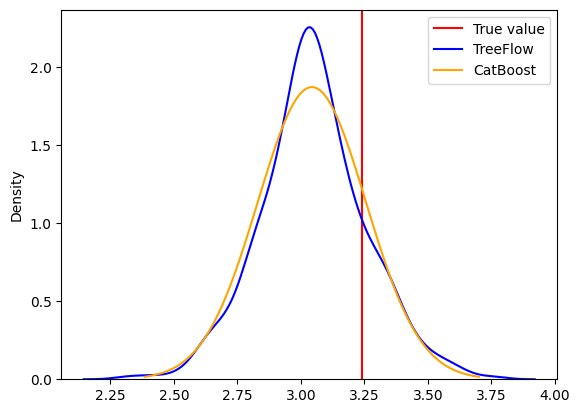

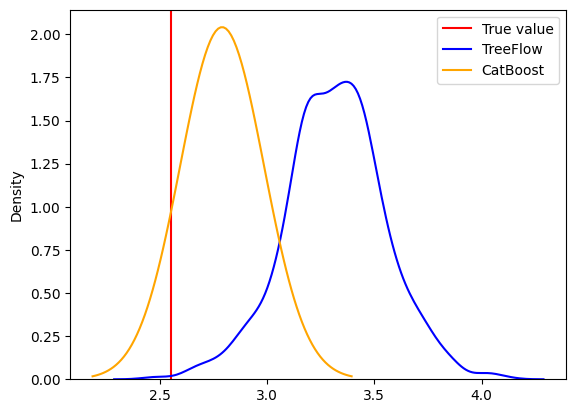

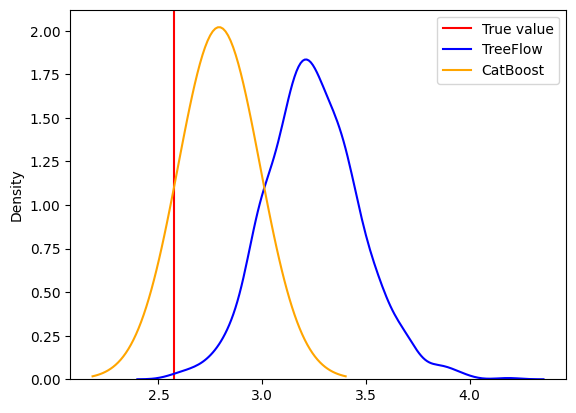

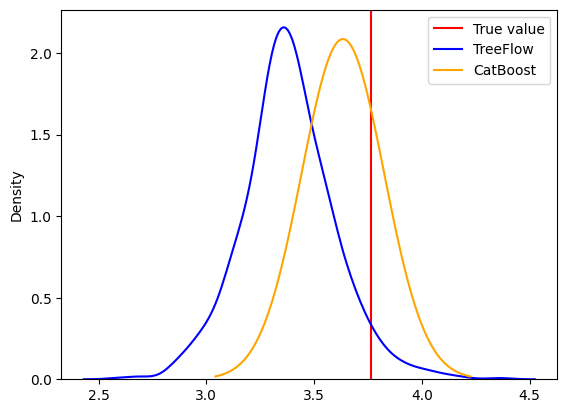

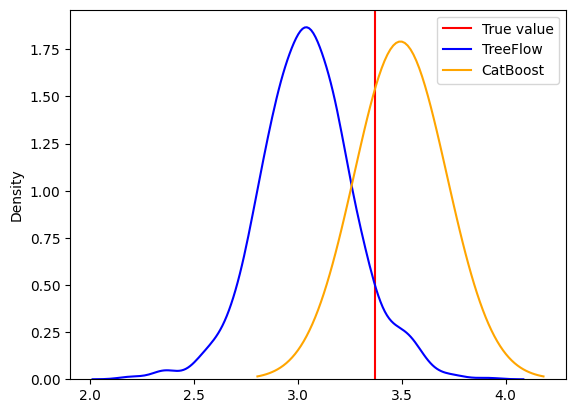

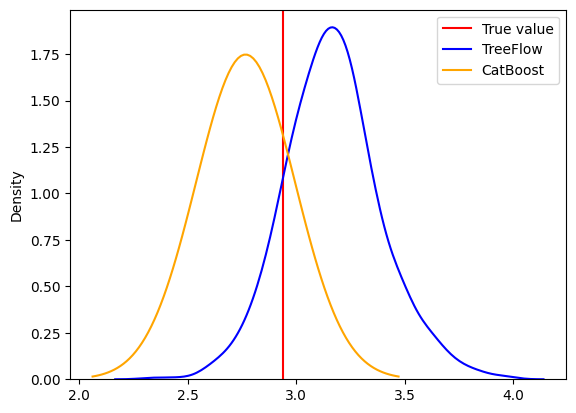

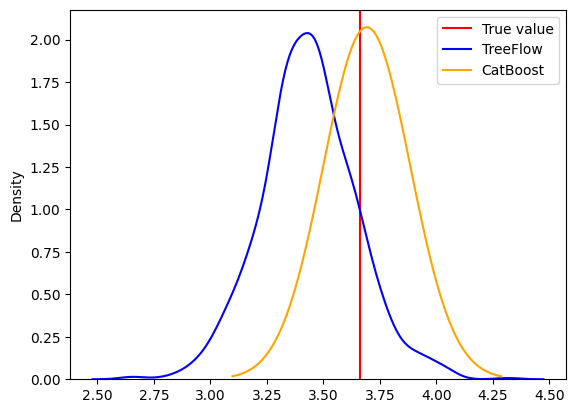

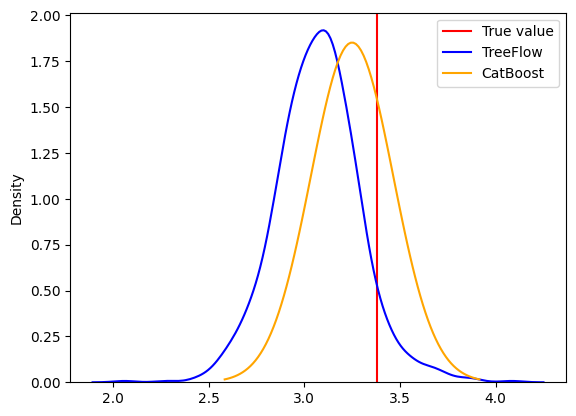

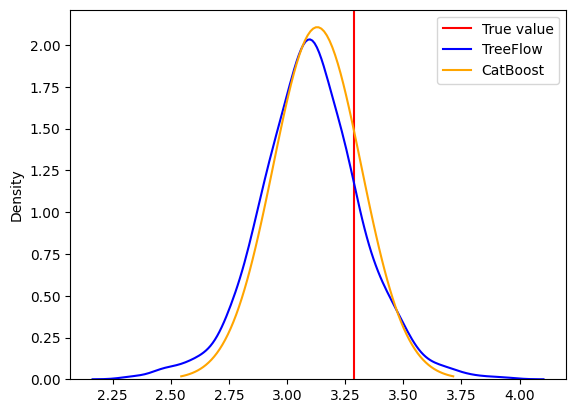

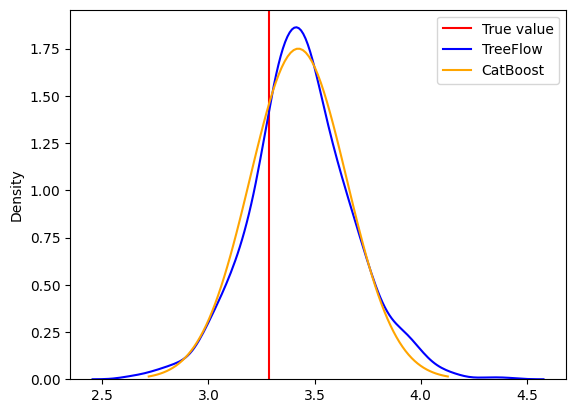

In [24]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()